# E 157AC Spring 2019

## Assignment: Problem Set 3
**Due:** Friday, April 5, 2019 at 11:59 pm
<br>
*Submit via bCourses*

**Before you begin, run the following cell to load the packages needed for the rest of the notebook**

In [1]:
# RUN THIS CELL or the notebook will not work properly
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Introduction <a id='section0'></a>

In this assignment, you will dive into some publicly available data on climate change, economic growth, and human development in an attempt to understand a little about the complex relationships between these parameters. 

With each chart you create, be sure to label your axes, create a chart title, and provide a simple regression line (including the $R^2$ value). Note that you don’t need a chart legend if you only have one set of data. Remember - presentation is important! Also remember that a robust analysis would use far more in depth statistics, in particular focusing on each component of your regression model, both the size of the effect of each component as well as the significance, but for the purposes of this problem set linear regression slopes and $R^2$ values will do.

The data is in a table named `problem_set` (Run the next cell to see what it looks like).

In [2]:
problem_set = Table.read_table('data/ps3data.csv')
problem_set

countries,co2_cummulative,ghg_cummulative,ghg_2010,co2_2011,change_1971_2011,change_1990_2011,total_footprint,pop_2010,gdp_ppp_2010,hdi_2011,hdi_change_1990_2011,gender_inequality_2012,maternal_2010
Afghanistan,72.4,349.34,24.94,nan,nan,nan,nan,2.83978e+07,33596,0.371,50.81,0.712,460
Albania,227.9,143.81,6.57,3.9,-0.3,-38,5.4,3.15014e+06,24545,0.748,13.16,0.251,27
Algeria,2272.4,2618.81,169.42,103.9,1064.8,97,nan,3.70628e+07,269075,0.711,26.51,0.391,97
Angola,305.3,3300.97,219.84,15.7,845.5,292,nan,1.95491e+07,98686,0.504,nan,nan,450
Antigua & Barbuda,16.6,14.17,1.2,nan,nan,nan,nan,87233,1541,0.759,nan,nan,nan
Argentina,5894.8,6308.23,359.01,183.6,121.8,83.8,165.5,4.03742e+07,580427,0.81,15.55,0.38,77
Armenia,505.6,183.45,13.43,4.7,nan,-77.2,6,2.9635e+06,15153,0.726,15.61,0.34,30
Australia,13108.5,10252.5,587.53,396.8,175.3,52.6,297,2.20653e+07,763921,0.936,6.36,0.115,7
Austria,4541.9,1712.92,84.28,68.5,40.6,21.4,99.8,8.38977e+06,296268,0.894,12.17,0.102,4
Azerbaijan,2323.7,1218.83,64.21,26.8,nan,-51.3,30.3,9.05433e+06,80696,0.732,nan,0.323,43


Note that some values in the table are listed as `nan`. This means that the entry is missing, incorrect, or unknown (Welcome to the "real world"). You will soon see how the presence of `nan` values can impact your graphs and regression outputs.

Here's a list of all the column labels contained in the table:

In [3]:
problem_set.labels

('countries',
 'co2_cummulative',
 'ghg_cummulative',
 'ghg_2010',
 'co2_2011',
 'change_1971_2011',
 'change_1990_2011',
 'total_footprint',
 'pop_2010',
 'gdp_ppp_2010',
 'hdi_2011',
 'hdi_change_1990_2011',
 'gender_inequality_2012',
 'maternal_2010')

### Data Dictionary<a id='section8'></a>

The table belows shows what each column in our data describes. 

|Column Name   | Description |
|--------------|---------|
|countries|Name of country|
|co2_cumulative |Historical Emissions A Cumulative CO2 emission from energy, 1850-2007 (million tonnes) |
|ghg_cumulative | Historical Emissions B Cumulative GHG Emissions, 1990-2010 (million tonnes CO2 equivalent) |
|ghg_2010| Current GHG Emissions Total GHG Emissions, 2010 (million tonnes CO2 equivalent)|
|co2_2011|Current CO2 Emissions CO2 emissions from fossil fuel combustion, 2011 (million tonnes) |
|change_1971_2011|Change from 1971–2011 (%) |
|change_1990_2011|Change from 1990–2011 (%) |
|total_footprint|Total carbon footprint Footprint of all goods and services consumed (million tonnes CO2 equivalent) |
|pop_2010|Population 2010|
|gdp_ppp_2010|GDP-PPP 2010 (Million $ (2005))|
|hdi_2011|HDI, 2011 |
|hdi_change_1990_2011|HDI Change from 1990-2011 (%) |
|gender_inequality_2012|Gender Inequality Index Value, 2012 |
|maternal_2010|Maternal Mortality Ratio, 2010 |

## Plotting <a id='section1'></a>

#### Scatter Plots
We've defined the following function `scatter` for you to use. You don't have to know exactly how it is implemented, but be sure to understand what it does and how it is used.

In [4]:
def scatter(x, y, x_label, y_label, title, fit_line=False):
    """
    Generate a scatter plot using x and y

    Arguments:
    x -- an array of x-values
    y -- an array of y-values
    
    Example Usage:
    x = problem_set.column("column 1")
    y = problem_set.column("column 2")
    p1= scatter(x,y, "column 1", "column 2", "title of graph", False) 
    """
    plt.figure(figsize=(8, 6))
    # Create a scatterplot of x and y columns
    plt.scatter(x,y, color='b', label='original data',alpha=0.2)
    
    if fit_line == True:
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        
        # Plot the best-fit line
        plt.plot(x, slope*x + intercept, 'r', label='fitted line')
        
        # Output the equation for the regression line
        print("regression line : y=" + str(slope) +"x + " + str(intercept))
        print("correlation: " + str(r_value))
        print("R^2: %f" % r_value**2)
        
    # Label the graph
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

Using `scatter()`, you're able to take any two columns of a table, and plot them quite easily! For example, let's plot the Current GHG Emissions, 2010 vs. Population (2010):

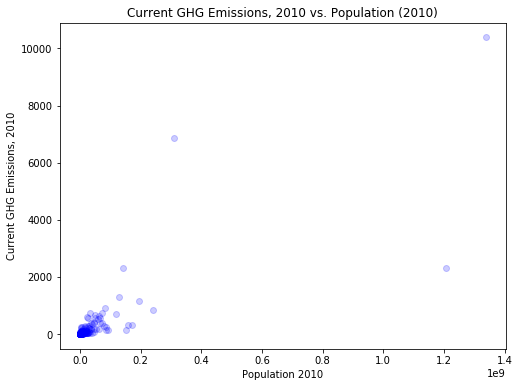

In [5]:
x_col = problem_set.column("pop_2010")
y_col = problem_set.column("ghg_2010")
scatter(x_col, y_col, x_label="Population 2010", y_label="Current GHG Emissions, 2010", 
        title="Current GHG Emissions, 2010 vs. Population (2010)", 
        fit_line=False)

It looks the scatter function only plots the points where the x and y values are not `nan`. For simply plotting on a scatter plot, this will not present any issues. However, let's see what happens if we perform linear regression on the data points and try to fit a regression line through the points. 

#### Linear Regression
If you wish to add a line of best fit to your graph, simply set the `fit_line` parameter to True.

regression line : y=nanx + nan
correlation: nan
R^2: nan


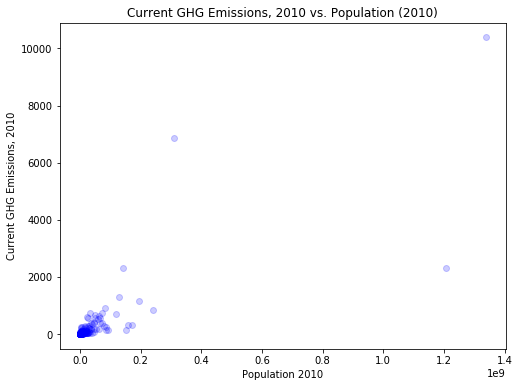

In [6]:
scatter(x_col, y_col, x_label="Population 2010", y_label="Current GHG Emissions, 2010", 
        title="Current GHG Emissions, 2010 vs. Population (2010)", 
        fit_line=True)

What happened here? Why is the line of best fit not displayed? **Hint:** look at the regression line equation above the graph.

#### Cleaning the data

If you guessed that `nan` values are throwing off the results of performing linear regression on the data points, you would be correct. This means we will have to clean the data by making sure that the coordinates of every point (x, y) are not `nan`. We've defined a function for you that cleans the data. Again, don't worry about the implementation, but make sure you know what it is doing and how to use it.

In [7]:
def clean(x_values, y_values):
    """
    Goes through corresponding pairs of x and y values. 
    Only keeps the coordinates where x and y are both not nan 

    Arguments:
    x_values -- an array of x-values
    y_values -- an array of y-values
    
    Example Usage:
    x = problem_set.column("column 1")
    y = problem_set.column("column 2")
    cleaned_x, cleaned_y = clean(x, y)
    """
    
    cleaned_coordinates = []
    
    # Make sure x_values and y_values are the same length
    assert len(x_values) == len(y_values)
    
    # Loops through every x, y pair
    for x, y in zip(x_col,y_col):
        # If x or y is nan, drop the coordinate
        if np.isnan(x) or np.isnan(y):
            continue
        else:
            cleaned_coordinates.append((x, y))
    
    cleaned_x_values, cleaned_y_values = zip(*cleaned_coordinates)
    
    # Return 2 arrays
    return np.array(cleaned_x_values), np.array(cleaned_y_values)

Now let's try graphing that regression line again after cleaning our two columns.

regression line : y=4.180958507053573e-06x + 18.599525981810302
correlation: 0.7825246821971606
R^2: 0.612345


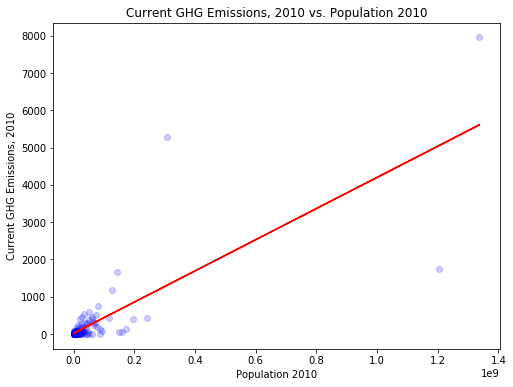

In [8]:
x_col = problem_set.column("pop_2010")
y_col = problem_set.column("co2_2011")

clean_x, clean_y = clean(x_col, y_col)

scatter(clean_x, clean_y, x_label="Population 2010", y_label="Current GHG Emissions, 2010", 
        title="Current GHG Emissions, 2010 vs. Population 2010", 
        fit_line=True)

## Problem 1

### Question 1a
Make a chart of Total GHG Emissions, 2010 vs GDP.

In [ ]:
# YOUR CODE HERE

### Question 1b
Explain your result in 2-3 sentences.

**Answer:** YOUR ANSWER HERE

## Problem 2


### Question 2a

Make a chart of Per-Capita Total GHG Emissions, 2010 vs. HDI.

In [ ]:
# YOUR CODE HERE

### Question 2b
Explain your result in 2-3 sentences.

**Answer:**
YOUR ANSWER HERE

## Problem 3

#### Sorting and Ranking
Often

### Question 3a
Make a chart of Cumulative CO2 Emissions from Energy (1850-2007) Rank vs. HDI Rank.

In [ ]:
# YOUR CODE HERE

### Question 3b
Explain your result in 2-3 sentences.

**Answer:**
YOUR ANSWER HERE

## Problem 4


### Question 4a

Make a chart of Cumulative CO2 Emissions from Energy (1850-2007) Per Capita Rank vs. HDI Rank.

In [ ]:
# YOUR CODE HERE

### Question 4b
Explain your result in 2-3 sentences.

**Answer:**
YOUR ANSWER HERE

## Problem 5

### Question 5a
Which country has the highest Total GHG Emissions in 2010?

In [ ]:
# YOUR CODE HERE

**Answer:**
YOUR ANSWER HERE

### Question 5b
Where do they rank on the per-capita scale?
<br>
**Hint:** Create a new column for Total GHG Emissions per capita.

In [ ]:
# YOUR CODE HERE

**Answer:**
YOUR ANSWER HERE

### Question 5c
Which country has the highest Total GHG Emissions per-capita?

In [ ]:
# YOUR CODE HERE

**Answer:**
YOUR ANSWER HERE

## Problem 6

### Question 6a
Which country has the highest “Footprint of all goods and services consumed”?

In [ ]:
# YOUR CODE HERE

**Answer:**
YOUR ANSWER HERE

### Question 6b
Which has the highest per-capita? 

In [ ]:
# YOUR CODE HERE

**Answer:**
YOUR ANSWER HERE

## Problem 7

Go to www.gapminder.org/tools. Create an animated graph that tells you something interesting about climate change (CO2 Emissions should be on one axis). 
* Note: you can change an axis by clicking on the axis label and selecting a new measure from the various options.

### Question 7a
**Use the print tool (or screenshots) to create an image of one year** (be careful – sometimes the most recent data doesn’t include many countries, so take a screenshot that includes most of the world) and include that with your assignment. Replace the words "Graph Title" with something more informative.

Upload it to Jupyter and display the screenshot in the next cell (Double click on the cell below (the "markdown cell") and replace the three dots (…) with the file name of the screenshot. Don’t forget to upload your screenshot to your data hub first!). Feel free to refer to Problem Set 1 for instructions on how to upload files to Jupyter.

**Graph Title**
![Graph](...)

### Question 7b

Explain your results in 2-4 sentences.

**Answer:**
YOUR ANSWER HERE

## Problem 8
Reflect on your findings.

### Question 8a
Do you think per-capita or total national emissions are the more appropriate way to do carbon accounting, and why?

**Answer:**
YOUR ANSWER HERE

### Question 8b
Do you think accounting should be based on what a country emits within its boundaries, or what a country consumes, including emissions from the production of goods elsewhere?

**Answer:**
YOUR ANSWER HERE

### Question 8c

**Select one choice and explain.** Do you think countries should reduce their emissions in proportion to:
* (A) Their past emissions
* (B) Their level of development & capacity to reduce
* (C) The degree to which they will be impacted by climate change
* (D) A combination of these, or something else

**Answer:**
YOUR ANSWER HERE

# Final Survey <a id='section7'></a>

Congrats! You've finished the final Jupyter Notebook assignment! The Division of Data Sciences and Information would like to ask you to please fill this survey out as a part of your assignment. We would like to improve the module for future semesters, and would really appreciate it if you took the time to fill this out so we can better serve you!

Please make sure you are logged into your Berkeley (.edu) email address to access the form.
### [Survey Link](https://goo.gl/forms/FqSRIYCzAAOfZ5Bv2)

Alternatively, please copy and paste this link into your URL bar: https://goo.gl/forms/FqSRIYCzAAOfZ5Bv2

## Saving the Notebook as an PDF

Congrats on finishing this notebook! As before, you will be submitting this notebook as an PDF file. To turn in this assignment follow the steps below:

1. **Important:** Click the Save icon located at the far left on the top toolbar. Make sure to do this before following the next steps.
2. Save the webpage as a PDF.
    * For Chrome users:
        1. Click on the rightmost button on the top toolbar
        2. In the drop down, click "Print"
        3. For "Destination", choose "Save as PDF"
    * For Firefox users:
        1. Click on the rightmost button on the top toolbar
        2. In the drop down, click "Print"
        3. Click Print and set the destination as "Adobe PDF" or "Microsoft Print to PDF"
5. Once the file downloads, open it using a PDF reader to make sure that everything looks okay.
6. If any pages are omitted from the output PDF, make sure that the images that you have uploaded to Jupyter are displaying properly in the notebook and that the correct filenames are specified. **Issues in converting the notebook to PDF format usually happen when an image in the notebook is not displayed/embedded properly.**
7. Submit to the Problem Set 3 Assignment on bCourses.